3.[44 points] Write a program to find the coefficients for a linear regression model for the dataset provided (data2.txt). Assume a linear model: y = w0 + w1*x. You need to

1)	Plot the data (i.e., x-axis for the 1st column, y-axis for the 2nd column), 
and use Python to implement the following methods to find the coefficients: 

2)	Normal equation, and

3)	Gradient Descent using batch AND stochastic modes respectively:

a)	Split dataset into 80% for training and 20% for testing. 

b)	Plot MSE vs. iteration of each mode for both training set and testing set; compare batch and stochastic modes (with discussion) in terms of accuracy (of testing set) and speed of convergence (You need to determine an appropriate termination condition, e.g., when cost function is less than a threshold, and/or after a given number of iterations.) 

c)	Plot MSE of the testing set vs. learning rate (using 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 
0.009, 0.01) and determine the best learning rate. 

Please implement the algorithms by yourself and do NOT use the fit() function of the library. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [2]:
data2=pd.read_csv('data2.txt')

In [3]:
data2=data2.sort_values('X').reset_index(drop=True)

In [4]:
x=data2['X'].values
y=data2['Y'].values

In [5]:
tra = np.vstack([np.ones(len(x)),x]).T
y_new = y[:,np.newaxis]
inter_val=np.matmul(tra.T,tra)
val_theta = np.matmul((np.matmul(np.linalg.inv(inter_val),tra.T)),y_new)
y_preds = val_theta[0] + val_theta[1]*x
print(y_preds)
print(val_theta)

[ 2.10147995  2.11293307  2.13452698  2.14025354  2.1531383   2.19787707
  2.22460102  2.28329828  2.29415488  2.37050903  2.43373982  2.43648379
  2.52202431  2.55483273  2.59062374  2.65409313  2.66518834  2.69024205
  2.6989512   2.71553436  2.74333205  2.79272364  2.83257096  2.833764
  2.91369725  2.91727635  2.93934748  2.94507404  2.99243747  3.02548451
  3.09515767  3.10816174  3.13333475  3.26480705  3.2698178   3.39377399
  3.48802365  3.58955081  3.65146926  3.65946258  3.68403908  3.68678305
  3.69060076  3.69835548  3.77494824  3.84247394  3.87790704  3.91608412
  3.96559502  4.31527318  4.45927234  4.53992141  4.56652606  4.71577457
  4.72496093  4.85452438  4.96118159  5.02381586  5.09802255  5.09993141
  5.17497322  5.21493985  5.43934948  5.56903223  5.7629002   5.90033768
  5.99852435  6.0005525   6.10530086  6.13572322  6.26552528  6.26719552
  6.33818102  6.63321825  7.05650658  7.13763287  7.21160096  7.38268198
  7.75860688  8.19680814  8.3161115   8.36144678  9.1

## 1

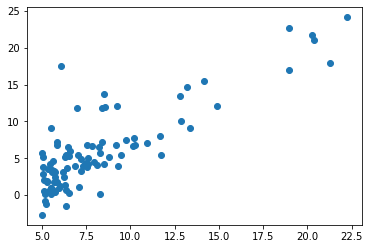

In [28]:
plt.scatter(x,y)
plt.show()

## 2

## Normal Equation

In [6]:
import sklearn
from sklearn.model_selection import train_test_split

### 3b - Splitting dataset here - x_test and y_test is used for calculating MSE below

In [7]:
X_train, X_test, y_train, y_test=train_test_split(data2['X'],data2['Y'], test_size=20, random_state=90)

In [8]:
y_train.shape

(77,)

In [29]:
X_b = np.c_[np.ones((len(X_train), 1)), X_train]  # add x0 = 1 to each instance
theta_val = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
theta_nor = X_new_b.dot(theta_val)
theta_nor

array([-4.21930646, -1.78594533])

## 3.1

# Stochastic Gradient Descent

In [10]:
def get_cost(theta,X,y):
    y_len = len(y)   
    y_preds = X.dot(theta)
    cost = (1/2*y_len) * np.sum(np.square(y_preds-y))
    return cost

In [11]:
def stochastic_gradient_descent(X,y,theta,learning_rate,iterations):
    
    X = np.c_[np.ones((len(X),1)),X]
  
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        cost =0.0
        for i in range(m):
   
            preds = np.dot(X,theta)
            dot_pro=X.T.dot((preds - y))
            theta = theta -(1/m)*learning_rate*( dot_pro)
            cost += get_cost(theta,X,y)
        cost_history[it]  = cost
       
      
    return theta, cost_history

In [12]:
# lr='0.01'
# theta,cost_history = stochastic_gradient_descent(X_train,y_train,theta,float(lr),n_iter)

#### Testing data is passed to calculate the cost

## 3c

In [13]:
lr =['0.001', '0.002', '0.003', '0.004', '0.005', '0.006', '0.007', '0.008', '0.009', '0.01']
n_iter = 20 #termination condition
theta = np.random.randn(2,1)

In [14]:
mse_dict={}
for i in lr:
    y_train_1= np.reshape(y_train.values,(len(y_train), 1))
    y_test_1= np.reshape(y_test.values,(len(y_test), 1))
    theta,cost_history = stochastic_gradient_descent(X_train,y_train_1,theta,float(i),n_iter)
    print('')
    print('#####')
    print('Learning Rate  = ',i)
    print('Theta = ',theta)
    
    X_new = np.c_[np.ones((len(X_test),1)),X_test]
    MSE_cost=get_cost(theta,X_new,y_test_1)
    
    mse_dict[float(i)]=MSE_cost
    print('MSE : ', MSE_cost)
    print('#####')
    print('')


#####
Learning Rate  =  0.001
Theta =  [[-1.57281681]
 [ 0.93659727]]
MSE :  3011.285809211995
#####


#####
Learning Rate  =  0.002
Theta =  [[-2.62460143]
 [ 1.04790974]]
MSE :  2895.5980053233247
#####


#####
Learning Rate  =  0.003
Theta =  [[-3.4734273 ]
 [ 1.13774268]]
MSE :  2884.5915479676705
#####


#####
Learning Rate  =  0.004
Theta =  [[-3.94852656]
 [ 1.18802339]]
MSE :  2910.541014747739
#####


#####
Learning Rate  =  0.005
Theta =  [[-4.1430097 ]
 [ 1.20860593]]
MSE :  2927.811291357557
#####


#####
Learning Rate  =  0.006
Theta =  [[-4.20262172]
 [ 1.21491479]]
MSE :  2933.878145651057
#####


#####
Learning Rate  =  0.007
Theta =  [[-4.21647482]
 [ 1.21638089]]
MSE :  2935.339961681007
#####


#####
Learning Rate  =  0.008
Theta =  [[-4.21893352]
 [ 1.2166411 ]]
MSE :  2935.6014573056955
#####


#####
Learning Rate  =  0.009
Theta =  [[-4.21926835]
 [ 1.21667653]]
MSE :  2935.637115770146
#####


#####
Learning Rate  =  0.01
Theta =  [[-4.21930344]
 [ 1.21668025]]


In [15]:
mse_dict

{0.001: 3011.285809211995,
 0.002: 2895.5980053233247,
 0.003: 2884.5915479676705,
 0.004: 2910.541014747739,
 0.005: 2927.811291357557,
 0.006: 2933.878145651057,
 0.007: 2935.339961681007,
 0.008: 2935.6014573056955,
 0.009: 2935.637115770146,
 0.01: 2935.6408538776623}

Best LR is 0.003

## Graph for LR vs MSE

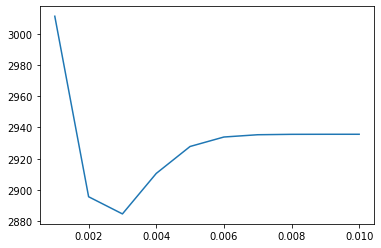

In [16]:


plt.plot(list(mse_dict.keys()), list(mse_dict.values()))
plt.show()

## 3.2

#  Batch Gradient Descent

In [17]:
def get_cost(theta,X,y):
    y_len = len(y)   
    y_preds = X.dot(theta)
    cost = (1/2*y_len) * np.sum(np.square(y_preds-y))
    return cost

In [18]:
def batch_gradient_descent(X,y,theta,learning_rate,iterations):
    
    
    X = np.c_[np.ones((len(X),1)),X]
    ylen = len(y)
    cost_history = np.zeros(iterations)
  
    for it in range(iterations):
        cost =0.0
        
       
        preds = np.dot(X,theta)
        dot_pro=X.T.dot((preds - y))
        theta = theta -(1/ylen)*learning_rate*(dot_pro)
        
        cost += get_cost(theta,Xbat,ybat)
        cost_history[it]  = cost
       
      
    return theta, cost_history

In [20]:
lr =['0.001', '0.002', '0.003', '0.004', '0.005', '0.006', '0.007', '0.008', '0.009', '0.01']
n_iter = 30
theta = np.random.randn(2,1)

In [21]:
mse_dict_batch={}
for i in lr:
    y_train_1= np.reshape(y_train.values,(len(y_train), 1))
    y_test_1= np.reshape(y_test.values,(len(y_test), 1))
    theta,cost_history = stochastic_gradient_descent(X_train,y_train_1,theta,float(i),n_iter)
    print('')
    print('#####')
    print('Learning Rate  = ',i)
    print('Theta = ',theta)
    
    X_new = np.c_[np.ones((len(X_test),1)),X_test]
    MSE_cost=get_cost(theta,X_new,y_test_1)
    
    mse_dict_batch[i]=MSE_cost
    print('MSE : ', MSE_cost)
    print('#####')
    print('')


#####
Learning Rate  =  0.001
Theta =  [[-0.8044811 ]
 [ 0.85528276]]
MSE :  3167.1873977748187
#####


#####
Learning Rate  =  0.002
Theta =  [[-2.62201656]
 [ 1.04763618]]
MSE :  2895.7438716748575
#####


#####
Learning Rate  =  0.003
Theta =  [[-3.70837116]
 [ 1.16260726]]
MSE :  2894.5435883385044
#####


#####
Learning Rate  =  0.004
Theta =  [[-4.10754609]
 [ 1.20485274]]
MSE :  2924.3742022211563
#####


#####
Learning Rate  =  0.005
Theta =  [[-4.20259085]
 [ 1.21491152]]
MSE :  2933.874909378862
#####


#####
Learning Rate  =  0.006
Theta =  [[-4.21759707]
 [ 1.21649966]]
MSE :  2935.459242089289
#####


#####
Learning Rate  =  0.007
Theta =  [[-4.21918695]
 [ 1.21666792]]
MSE :  2935.628446058944
#####


#####
Learning Rate  =  0.008
Theta =  [[-4.21930075]
 [ 1.21667996]]
MSE :  2935.640567397131
#####


#####
Learning Rate  =  0.009
Theta =  [[-4.21930628]
 [ 1.21668055]]
MSE :  2935.6411560076804
#####


#####
Learning Rate  =  0.01
Theta =  [[-4.21930646]
 [ 1.21668057]

In [22]:
mse_dict_batch

{'0.001': 3167.1873977748187,
 '0.002': 2895.7438716748575,
 '0.003': 2894.5435883385044,
 '0.004': 2924.3742022211563,
 '0.005': 2933.874909378862,
 '0.006': 2935.459242089289,
 '0.007': 2935.628446058944,
 '0.008': 2935.640567397131,
 '0.009': 2935.6411560076804,
 '0.01': 2935.6411754460487}

Best LR us 0.03

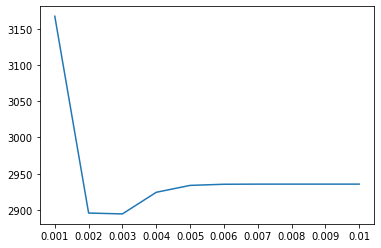

In [24]:
plt.plot(list(mse_dict_batch.keys()), list(mse_dict_batch.values()))
plt.show()

 # HW ENDS HERE

In [169]:
for i in lr 
theta,cost_history = stochastic_gradient_descent(X_train,y_train,theta,lr,n_iter)

print('Theta0:{:0.3f},\nTheta1:{:0.3f}'.format(theta[0][0],theta[1][0]))


Theta0:-4.219,
Theta1:1.217


### Testing

In [170]:
X_new = np.c_[np.ones((len(X_test),1)),X_test]
MSE_cost=get_cost(theta,X_new,y_test)

In [171]:
MSE_cost

2935.640050972804

In [157]:
theta

array([-1.5467311])

In [140]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X_train),1)),X_train]

In [141]:
theta

array([[ 0.64252965],
       [-0.94078682]])

In [142]:
X_b

array([[ 1.    ,  5.4901],
       [ 1.    ,  6.3557],
       [ 1.    ,  7.4764],
       [ 1.    ,  7.8247],
       [ 1.    , 10.136 ],
       [ 1.    ,  5.1884],
       [ 1.    , 18.959 ],
       [ 1.    ,  5.6063],
       [ 1.    ,  7.9334],
       [ 1.    ,  5.5204],
       [ 1.    ,  8.5186],
       [ 1.    ,  6.3589],
       [ 1.    ,  5.734 ],
       [ 1.    ,  5.0594],
       [ 1.    ,  5.5649],
       [ 1.    ,  8.5781],
       [ 1.    ,  5.6407],
       [ 1.    ,  6.0062],
       [ 1.    ,  9.3102],
       [ 1.    ,  7.2182],
       [ 1.    , 13.176 ],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.3077],
       [ 1.    ,  5.5416],
       [ 1.    ,  6.8825],
       [ 1.    ,  6.3654],
       [ 1.    , 14.908 ],
       [ 1.    , 10.957 ],
       [ 1.    ,  7.2259],
       [ 1.    ,  6.002 ],
       [ 1.    ,  6.4862],
       [ 1.    ,  7.6031],
       [ 1.    ,  7.6366],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4069],
       [ 1.    ,  6.4296],
       [ 1.    ,  5.1301],
 

In [131]:
n_iterations = 1000
learning_rate = 0.01
 
def predict(X, y, coef):
    '''
    Activation function: w0 + w1*x1 + w2*x2 + ... + wn*xn
    '''
    output = np.dot(X, coef[1:]) + coef[0]
    '''
    Unit Step function: Predict 1 if output >= 0 else 0
    '''
    return np.where(output >= 0.0, 1, 0)
     
def fit(X, y):
        rgen = np.random.RandomState(1)
        coef_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        for _ in range(n_iterations):
            for xi, expected_value in zip(X, y):
                predicted_value = predict(xi, expected_value, coef_)
        
                coef_[1:] += learning_rate * (expected_value - predicted_value) * xi
                coef_[0] += learning_rate * (expected_value - predicted_value) * 1
        print(coef_)
        return coef_

In [132]:
fit(X_train,y_train)

[ 3377.72644345 38314.062335  ]


array([ 3377.72644345, 38314.062335  ])

In [124]:
# Building the model
m = 0
c = 0

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X_train)) # Number of elements in X

# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X_train + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X_train * (y_train - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y_train - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    
print (m, c)

[0.77633506] [-0.058511]


In [ ]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y) 
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')  # regression line
plt.show()

In [98]:
def  get_cost(theta,X,y):
    y_len = len(y)   
    y_preds = X.dot(theta)
    cost = (1/2*y_len) * np.sum(np.square(y_preds-y))
    return cost

In [102]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=97):
    y_len = len(y)  
    for it in range(iterations):
        
        preds = np.dot(X,theta)
        
        theta = theta -(1/y_len)*learning_rate*( X.T.dot((preds - y)))
      
    return theta
        

In [116]:
import sklearn
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test=train_test_split(X1,Y1, test_size=20, random_state=90)

In [121]:
y_predict

array([[-3.89578088],
       [-1.50971359]])

In [119]:
lr =0.01
n_iter = 1000

theta = y_predict

X_b = np.c_[np.ones((len(X_train),1)),X_train]
theta,theta_history = gradient_descent(X_b,y_train,theta,lr,n_iter)

In [120]:
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))


Theta0:          -4.103,
Theta1:          1.204
Final cost/MSE:  22237.619


In [57]:
X1.shape

(97, 1)

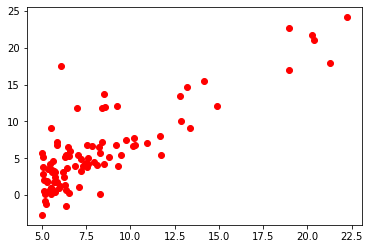

In [58]:
plt.plot(data2['X'],data2['Y'],'ro')

In [50]:
theta_og = np.linalg.inv(X1.T.dot(X1)).dot(X1.T).dot(Y1)

In [93]:
X1=data2['X'].to_numpy()
X1=X1.reshape(97,1)
Y1=data2['Y'].to_numpy()
Y1=Y1.reshape(97,1)

In [94]:
X_b = np.c_[np.ones((97, 1)), X1]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y1)

In [95]:
theta_best

array([[-3.89578088],
       [ 1.19303364]])

In [96]:
new_y_vals = theta_best[0] + theta_best[1]*X1
print(new_y_vals)

[[ 2.10147995]
 [ 2.11293307]
 [ 2.13452698]
 [ 2.14025354]
 [ 2.1531383 ]
 [ 2.19787707]
 [ 2.22460102]
 [ 2.28329828]
 [ 2.29415488]
 [ 2.37050903]
 [ 2.43373982]
 [ 2.43648379]
 [ 2.52202431]
 [ 2.55483273]
 [ 2.59062374]
 [ 2.65409313]
 [ 2.66518834]
 [ 2.69024205]
 [ 2.6989512 ]
 [ 2.71553436]
 [ 2.74333205]
 [ 2.79272364]
 [ 2.83257096]
 [ 2.833764  ]
 [ 2.91369725]
 [ 2.91727635]
 [ 2.93934748]
 [ 2.94507404]
 [ 2.99243747]
 [ 3.02548451]
 [ 3.09515767]
 [ 3.10816174]
 [ 3.13333475]
 [ 3.26480705]
 [ 3.2698178 ]
 [ 3.39377399]
 [ 3.48802365]
 [ 3.58955081]
 [ 3.65146926]
 [ 3.65946258]
 [ 3.68403908]
 [ 3.68678305]
 [ 3.69060076]
 [ 3.69835548]
 [ 3.77494824]
 [ 3.84247394]
 [ 3.87790704]
 [ 3.91608412]
 [ 3.96559502]
 [ 4.31527318]
 [ 4.45927234]
 [ 4.53992141]
 [ 4.56652606]
 [ 4.71577457]
 [ 4.72496093]
 [ 4.85452438]
 [ 4.96118159]
 [ 5.02381586]
 [ 5.09802255]
 [ 5.09993141]
 [ 5.17497322]
 [ 5.21493985]
 [ 5.43934948]
 [ 5.56903223]
 [ 5.7629002 ]
 [ 5.90033768]
 [ 5.99852

In [69]:
Y1

array([[-2.6807 ],
       [ 5.7014 ],
       [ 3.8166 ],
       [ 2.8214 ],
       [ 5.1337 ],
       [ 2.0576 ],
       [ 0.56077],
       [-0.74279],
       [ 0.20421],
       [-1.22   ],
       [ 1.9869 ],
       [ 1.8396 ],
       [ 3.5129 ],
       [ 0.55657],
       [ 0.61705],
       [ 4.263  ],
       [ 1.0173 ],
       [ 0.152  ],
       [ 9.1302 ],
       [ 1.0179 ],
       [ 3.0825 ],
       [ 3.3928 ],
       [ 4.6042 ],
       [ 0.71618],
       [ 1.8451 ],
       [ 3.2522 ],
       [ 0.47953],
       [ 3.1551 ],
       [ 2.4406 ],
       [ 1.844  ],
       [ 6.8233 ],
       [ 7.2029 ],
       [ 1.8495 ],
       [ 0.92695],
       [ 1.2784 ],
       [17.592  ],
       [ 3.1386 ],
       [ 2.4756 ],
       [ 5.1875 ],
       [ 1.4233 ],
       [ 5.4974 ],
       [ 0.67861],
       [-1.4211 ],
       [ 5.3048 ],
       [ 3.6518 ],
       [ 6.5987 ],
       [ 5.3436 ],
       [ 0.29678],
       [ 5.9966 ],
       [ 3.9115 ],
       [11.854  ],
       [ 5.3893 ],
       [ 1.0

In [66]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)


array([[-3.89578088],
       [-1.50971359]])

In [59]:
X_transpose = X1.T  
best_params = inv(X_transpose.dot(X1)).dot(X_transpose).dot(Y1) 

In [60]:
best_params

array([[0.80252685]])

In [35]:
X1=data2['X']
X1=X1.flatten(order='C')
y1=data2['Y']
print(X1.shape)
X=np.reshape(X1, (97, 1))
y=np.reshape(Y1, (97, 1))

AttributeError: 'Series' object has no attribute 'flatten'

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional